In [1]:
# importando bibliotecas
import csv

import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Especificando cada caminho

In [2]:
dataset = 'model/keypoint_classifier/keypoint_dataset.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier_mlp.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier_mlp.tflite'

# Definindo o número de classes

In [3]:
NUM_CLASSES = 4

# Leitura do dataset

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Construção do modelo

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 4)                 44        
                                                                 
Total params: 1,114
Trainable params: 1,114
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Checkpoint callback do modelo
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback para parada antecipada
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Compilação do modelo
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Treino do Modelo

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/15 [=>............................] - ETA: 3s - loss: 1.8340 - accuracy: 0.1641
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier_mlp.hdf5
15/15 [==============================] - 0s 11ms/step - loss: 1.6923 - accuracy: 0.1444 - val_loss: 1.4910 - val_accuracy: 0.1361
Epoch 2/1000
 1/15 [=>............................] - ETA: 0s - loss: 1.5201 - accuracy: 0.1719
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier_mlp.hdf5
15/15 [==============================] - 0s 4ms/step - loss: 1.4800 - accuracy: 0.1729 - val_loss: 1.3879 - val_accuracy: 0.3475
Epoch 3/1000
 1/15 [=>............................] - ETA: 0s - loss: 1.4246 - accuracy: 0.1484
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier_mlp.hdf5
15/15 [==============================] - 0s 4ms/step - loss: 1.4074 - accuracy: 0.2352 - val_loss: 1.3720 - val_accuracy: 0.4082
Epoch 4/1000
 1/15 [=>............................] - ETA: 0s - loss: 1.4034 - accur

Epoch 28/1000
 1/15 [=>............................] - ETA: 0s - loss: 1.0185 - accuracy: 0.5234
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier_mlp.hdf5
15/15 [==============================] - 0s 3ms/step - loss: 1.0528 - accuracy: 0.5022 - val_loss: 0.9021 - val_accuracy: 0.6049
Epoch 29/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.9326 - accuracy: 0.6094
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier_mlp.hdf5
15/15 [==============================] - 0s 3ms/step - loss: 1.0332 - accuracy: 0.5235 - val_loss: 0.8847 - val_accuracy: 0.7279
Epoch 30/1000
 1/15 [=>............................] - ETA: 0s - loss: 1.1515 - accuracy: 0.4688
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier_mlp.hdf5
15/15 [==============================] - 0s 3ms/step - loss: 1.0139 - accuracy: 0.5388 - val_loss: 0.8618 - val_accuracy: 0.7426
Epoch 31/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.9916 -

Epoch 55/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.9772 - accuracy: 0.5859
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier_mlp.hdf5
15/15 [==============================] - 0s 3ms/step - loss: 0.8213 - accuracy: 0.6827 - val_loss: 0.5963 - val_accuracy: 0.8967
Epoch 56/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.7420 - accuracy: 0.7422
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier_mlp.hdf5
15/15 [==============================] - 0s 3ms/step - loss: 0.8224 - accuracy: 0.6668 - val_loss: 0.6076 - val_accuracy: 0.8967
Epoch 57/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.8098 - accuracy: 0.6719
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier_mlp.hdf5
15/15 [==============================] - 0s 3ms/step - loss: 0.8156 - accuracy: 0.6712 - val_loss: 0.5928 - val_accuracy: 0.9016
Epoch 58/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.9310 -

Epoch 82/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.6993 - accuracy: 0.7578
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier_mlp.hdf5
15/15 [==============================] - 0s 3ms/step - loss: 0.7410 - accuracy: 0.7166 - val_loss: 0.4960 - val_accuracy: 0.9164
Epoch 83/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.7239 - accuracy: 0.7344
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier_mlp.hdf5
15/15 [==============================] - 0s 4ms/step - loss: 0.7446 - accuracy: 0.7101 - val_loss: 0.4907 - val_accuracy: 0.9148
Epoch 84/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.7833 - accuracy: 0.7188
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier_mlp.hdf5
15/15 [==============================] - 0s 4ms/step - loss: 0.7518 - accuracy: 0.7155 - val_loss: 0.5035 - val_accuracy: 0.9148
Epoch 85/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.9104 -

Epoch 109/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.6759 - accuracy: 0.7422
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier_mlp.hdf5
15/15 [==============================] - 0s 3ms/step - loss: 0.7199 - accuracy: 0.7177 - val_loss: 0.4653 - val_accuracy: 0.9213
Epoch 110/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.6830 - accuracy: 0.7422
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier_mlp.hdf5
15/15 [==============================] - 0s 3ms/step - loss: 0.6961 - accuracy: 0.7358 - val_loss: 0.4730 - val_accuracy: 0.9148
Epoch 111/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.6390 - accuracy: 0.7500
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier_mlp.hdf5
15/15 [==============================] - 0s 3ms/step - loss: 0.6744 - accuracy: 0.7560 - val_loss: 0.4531 - val_accuracy: 0.9180
Epoch 112/1000
 1/15 [=>............................] - ETA: 0s - loss: 0

15/15 [==============================] - 0s 4ms/step - loss: 0.6588 - accuracy: 0.7582 - val_loss: 0.4299 - val_accuracy: 0.9164
Epoch 136/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.6515 - accuracy: 0.7734
Epoch 136: saving model to model/keypoint_classifier\keypoint_classifier_mlp.hdf5
15/15 [==============================] - 0s 3ms/step - loss: 0.6736 - accuracy: 0.7511 - val_loss: 0.4420 - val_accuracy: 0.8984
Epoch 137/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.6102 - accuracy: 0.7500
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier_mlp.hdf5
15/15 [==============================] - 0s 3ms/step - loss: 0.6562 - accuracy: 0.7533 - val_loss: 0.4419 - val_accuracy: 0.9148
Epoch 138/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.6407 - accuracy: 0.7812
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier_mlp.hdf5
15/15 [==============================] - 0s 3ms/step - loss: 0.6596 - acc

In [12]:
# Avaliação do modelo
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

5/5 [==============================] - 0s 1ms/step - loss: 0.4126 - accuracy: 0.9131


In [13]:
# Carregando o modelo salvo
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Teste de Inferência
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[0.03433203 0.01361032 0.13412687 0.81793076]
3


# Matriz de Confusão

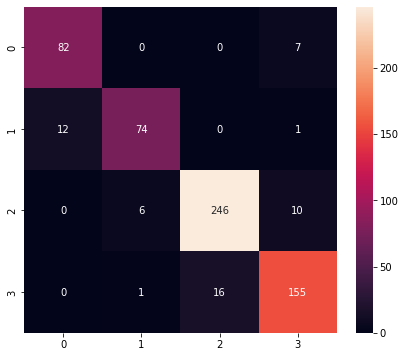

Relatório de classificação
              precision    recall  f1-score   support

           0       0.87      0.92      0.90        89
           1       0.91      0.85      0.88        87
           2       0.94      0.94      0.94       262
           3       0.90      0.90      0.90       172

    accuracy                           0.91       610
   macro avg       0.91      0.90      0.90       610
weighted avg       0.91      0.91      0.91       610



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Relatório de classificação')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convertendo modelo para Tensorflow-Lite

In [16]:
# Salvando modelo dedicado à inferência
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transformando o modelo (quantização)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\pablo\AppData\Local\Temp\tmpu52fb24y\assets


6416

# Teste de Inferência

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Obtendo tensor I / O 
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Implementação da inferência
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.03433202 0.01361032 0.13412684 0.81793076]
3
